# Pre-settings

### Plot

In [1]:
plotpars = {'axes.labelsize': 18,
            'axes.linewidth': 1.,
            'figure.figsize': (7.,5.),
            'font.size': 12,
            'legend.frameon': True,
            'legend.framealpha': 0.85,
            'legend.edgecolor': 'black',
            'legend.loc': 'best',
            'legend.fontsize': 12,
            'mathtext.fontset': 'stixsans',
            'savefig.bbox': 'tight',
            'xtick.labelsize': 18,
            'ytick.labelsize': 18,
           }

In [2]:
palette = ['#23576B', '#35B8EA', '#2980A1', '#162F38', '#060C0E'] 

### Constants

In [3]:
mpc_to_cm  = 3.086E24
h_alpha_wl = 6.563E-5   # in cm = 6563A

# Libraries

In [4]:
import numpy              as np
import pandas             as pd
import matplotlib.pyplot  as plt
import matplotlib.ticker  as mtick
import seaborn            as sns
import os
from matplotlib.gridspec  import GridSpec
from mpl_toolkits.mplot3d import Axes3D
from astropy.cosmology    import FlatLambdaCDM

# Dataset(s), paths, tests

In [5]:
data = pd.read_csv('../../Catalogue/Match07_smalldoubleclean_emlines.csv')

In [6]:
output_path = '../../LargeFilesResults/SEDFitting/Pre_Analysis/'

In [7]:
np.unique(data['TYPE'].values, return_counts=True)

(array([3]), array([14331]))

In [8]:
for i in data.keys():
    print(i)

CATAID
OBJID_SDSSDR7
ALPHA_J2000
DELTA_J2000
KRON_RADIUS
PETRO_RADIUS
MAG_PETRO_u
MAGERR_PETRO_u
FLAGS_u
MAG_PETRO_g
MAGERR_PETRO_g
FLAGS_g
MAG_PETRO_r
MAGERR_PETRO_r
FLAGS_r
MAG_PETRO_i
MAGERR_PETRO_i
FLAGS_i
MAG_PETRO_z
MAGERR_PETRO_z
FLAGS_z
MAG_PETRO_X
MAGERR_PETRO_X
FLAGS_X
MAG_PETRO_Y
MAGERR_PETRO_Y
FLAGS_Y
MAG_PETRO_J
MAGERR_PETRO_J
FLAGS_J
MAG_PETRO_H
MAGERR_PETRO_H
FLAGS_H
MAG_PETRO_K
MAGERR_PETRO_K
FLAGS_K
FLAGS
PSFMAG_R
FIBERMAG_R
FLAGS_R_SDSS
PETRORAD_R
PETROR90_R
PETROR50_R
PETROMAG_R
MODELMAG_U
MODELMAG_G
MODELMAG_R
MODELMAG_I
MODELMAG_Z
STATUS
BEST_MAG_NUV
BEST_MAGERR_NUV
BEST_MAG_FUV
BEST_MAGERR_FUV
BEST_METHOD
NMATCHUV
NMATCHOPT
NUVFLAG
FUVFLAG
NN_DIST
NN_NMATCH4
NN_MANY2ONE
NN_SFLAGS_NUV
NN_SFLAGS_FUV
KCORR_FUV
KCORR_NUV
KCORR_U
KCORR_G
KCORR_R
KCORR_I
KCORR_Z
KCORR_Y
KCORR_J
KCORR_H
KCORR_K
CHI2
MASS
INTSFH
METS
B300
B1000
SURVEY_CODE
SURVEY_CLASS
nbands
S2N
PPP
logmstar
dellogmstar
logmoverl_i
dellogmoverl_i
logage
dellogage
logtau
dellogtau
logmintsfh
dellogmintsfh

In [9]:
data = data.fillna('Unclassified')

## UV upturn objects

In [10]:
uvup_data  = data.loc[data['UV_CLASS_YI2011']=='UV_UPTURN']
data_gby   = uvup_data.groupby('WHAN_CLASS')
data_count = data_gby.count()

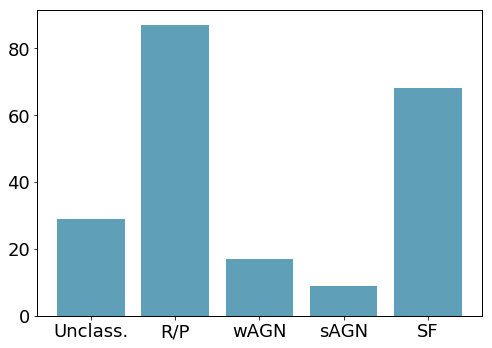

In [12]:
order = [2,0,4,3,1]
plt.bar(x=data_count.index.values[order], height=data_count['CATAID'].values[order], color=palette[2], alpha=0.75)
plt.rcParams.update(plotpars)
plt.xticks([0,1,2,3,4],['Unclass.', 'R/P', 'wAGN', 'sAGN', 'SF'])
plt.tight_layout()
plt.savefig(os.path.join(output_path, 'distribution_of_uvups.png'))
plt.savefig(os.path.join(output_path, 'distribution_of_uvups.pdf'))
plt.show()

# Cosmology

In [13]:
adopted_cosmology   = FlatLambdaCDM(H0=70, Om0=0.3)
luminosity_distance = adopted_cosmology.luminosity_distance(uvup_data['Z']).value

# SFR

In [14]:
rm_spur_halpha = np.where(uvup_data['HA_FLUX_COMP'].values!=-99999.)

In [15]:
luminosity = 4*np.pi*((luminosity_distance[rm_spur_halpha]/h_alpha_wl)**2)*(uvup_data['HA_EW_COMP'].
                                                                               iloc[rm_spur_halpha].values)
luminosity_cm = luminosity * mpc_to_cm

In [16]:
sfr = (7.9E-42) * luminosity_cm # the wl correction 

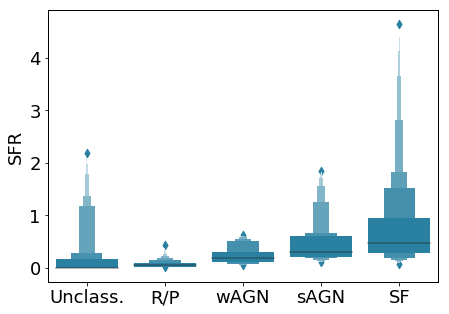

In [55]:
plt.rcParams.update(plotpars)
sns.boxenplot(x=uvup_data['WHAN_CLASS'].iloc[rm_spur_halpha].values, 
            y=sfr[np.where(uvup_data['WHAN_CLASS'].iloc[rm_spur_halpha].values)], color=palette[2], saturation=1.,
              order=['Unclassified', 'Retired/Passive', 'wAGN', 'sAGN', 'SF'])
plt.xticks([0,1,2,3,4],['Unclass.', 'R/P', 'wAGN', 'sAGN', 'SF'])
# plt.yscale('log')
plt.ylabel(r"SFR")
plt.savefig(os.path.join(output_path, 'bxplt_uvup_sfr.png'))
plt.savefig(os.path.join(output_path, 'bxplt_uvup_sfr.pdf'))
plt.show()

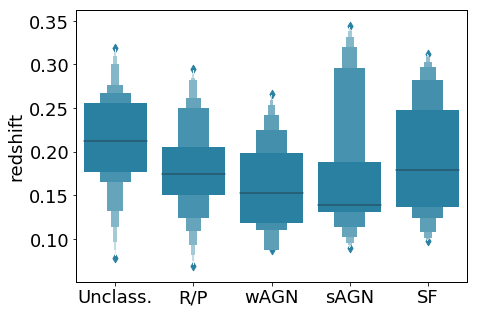

In [56]:
plt.rcParams.update(plotpars)
sns.boxenplot(x=uvup_data['WHAN_CLASS'].iloc[rm_spur_halpha].values, 
            y=uvup_data['Z'].values[np.where(uvup_data['WHAN_CLASS'].iloc[rm_spur_halpha].values)], color=palette[2], saturation=1.,
              order=['Unclassified', 'Retired/Passive', 'wAGN', 'sAGN', 'SF'])
plt.xticks([0,1,2,3,4],['Unclass.', 'R/P', 'wAGN', 'sAGN', 'SF'])
# plt.yscale('log')
plt.ylabel(r"redshift")
plt.savefig(os.path.join(output_path, 'bxplt_uvup_z.png'))
plt.savefig(os.path.join(output_path, 'bxplt_uvup_z.pdf'))
plt.show()

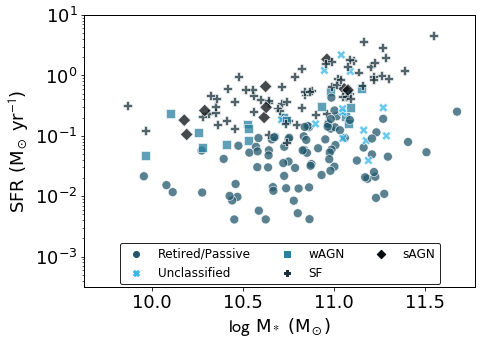

In [149]:
classes = ['R/P', 'SF', 'Unclass.', 'sAGN', 'wAGN']
plt.rcParams.update(plotpars)
plot01 = sns.scatterplot(x=uvup_data['logmstar'].iloc[rm_spur_halpha].values, y=sfr, 
                         hue=uvup_data['WHAN_CLASS'].iloc[rm_spur_halpha].values, 
                         style=uvup_data['WHAN_CLASS'].iloc[rm_spur_halpha].values, s=80, palette=palette, alpha=0.75)
plot01.legend(loc='lower center', borderaxespad=0.2, ncol=3)
plt.xlabel("$\log$ M$_*$ (M$_\odot$)")
plt.ylabel("SFR (M$_\odot$ yr$^{-1}$)")
plt.yscale('log')
plt.ylim([10**(-3.5), 10**1])
plt.savefig(os.path.join(output_path, 'scatter_mass_sfr.png'))
plt.savefig(os.path.join(output_path, 'scatter_mass_sfr.pdf'))
plt.show()